# --- Day 18: Settlers of The North Pole ---

On the outskirts of the North Pole base construction project, many Elves are collecting lumber.

The lumber collection area is 50 acres by 50 acres; each acre can be either open ground (.), trees (|), or a lumberyard (#). You take a scan of the area (your puzzle input).

Strange magic is at work here: each minute, the landscape looks entirely different. In exactly one minute, an open acre can fill with trees, a wooded acre can be converted to a lumberyard, or a lumberyard can be cleared to open ground (the lumber having been sent to other projects).

The change to each acre is based entirely on the contents of that acre as well as the number of open, wooded, or lumberyard acres adjacent to it at the start of each minute. Here, "adjacent" means any of the eight acres surrounding that acre. (Acres on the edges of the lumber collection area might have fewer than eight adjacent acres; the missing acres aren't counted.)

In particular:

* An open acre will become filled with trees if three or more adjacent acres contained trees. Otherwise, nothing happens.
* An acre filled with trees will become a lumberyard if three or more adjacent acres were lumberyards. Otherwise, nothing happens.
* An acre containing a lumberyard will remain a lumberyard if it was adjacent to at least one other lumberyard and at least one acre containing trees. Otherwise, it becomes open.

These changes happen across all acres simultaneously, each of them using the state of all acres at the beginning of the minute and changing to their new form by the end of that same minute. Changes that happen during the minute don't affect each other.

For example, suppose the lumber collection area is instead only 10 by 10 acres with this initial configuration:
```
Initial state:
.#.#...|#.
.....#|##|
.|..|...#.
..|#.....#
#.#|||#|#|
...#.||...
.|....|...
||...#|.#|
|.||||..|.
...#.|..|.

After 1 minute:
.......##.
......|###
.|..|...#.
..|#||...#
..##||.|#|
...#||||..
||...|||..
|||||.||.|
||||||||||
....||..|.

After 2 minutes:
.......#..
......|#..
.|.|||....
..##|||..#
..###|||#|
...#|||||.
|||||||||.
||||||||||
||||||||||
.|||||||||

After 3 minutes:
.......#..
....|||#..
.|.||||...
..###|||.#
...##|||#|
.||##|||||
||||||||||
||||||||||
||||||||||
||||||||||

After 4 minutes:
.....|.#..
...||||#..
.|.#||||..
..###||||#
...###||#|
|||##|||||
||||||||||
||||||||||
||||||||||
||||||||||

After 5 minutes:
....|||#..
...||||#..
.|.##||||.
..####|||#
.|.###||#|
|||###||||
||||||||||
||||||||||
||||||||||
||||||||||

After 6 minutes:
...||||#..
...||||#..
.|.###|||.
..#.##|||#
|||#.##|#|
|||###||||
||||#|||||
||||||||||
||||||||||
||||||||||

After 7 minutes:
...||||#..
..||#|##..
.|.####||.
||#..##||#
||##.##|#|
|||####|||
|||###||||
||||||||||
||||||||||
||||||||||

After 8 minutes:
..||||##..
..|#####..
|||#####|.
||#...##|#
||##..###|
||##.###||
|||####|||
||||#|||||
||||||||||
||||||||||

After 9 minutes:
..||###...
.||#####..
||##...##.
||#....###
|##....##|
||##..###|
||######||
|||###||||
||||||||||
||||||||||

After 10 minutes:
.||##.....
||###.....
||##......
|##.....##
|##.....##
|##....##|
||##.####|
||#####|||
||||#|||||
||||||||||
```
After 10 minutes, there are 37 wooded acres and 31 lumberyards. Multiplying the number of wooded acres by the number of lumberyards gives the total resource value after ten minutes: 37 * 31 = 1147.

What will the total resource value of the lumber collection area be after 10 minutes?


In [1]:
import unittest
from collections import Counter

In [2]:
day18input = open('input.txt').read().splitlines()

In [3]:
testinput = '''.#.#...|#.
.....#|##|
.|..|...#.
..|#.....#
#.#|||#|#|
...#.||...
.|....|...
||...#|.#|
|.||||..|.
...#.|..|.'''.splitlines()

In [4]:
TREES, OPEN, YARD = ('|', '.', '#')

class LumberArea(object):
    
    def __init__(self, initial):
        
        self.width = None
        self.height = None
        self.state = self._pad(initial)
        self.t = 0
        
    def resourceValue(self):
        c = Counter(''.join(self.state))
        return c[TREES] * c[YARD]

    def _pad(self, l):
        self.width = len(l[0])
        self.height = len(l)
        newl = []
        newl.append(' '*(self.width + 2))
        for s in l:
            newl.append(' ' + s + ' ')
        newl.append(' '*(self.width + 2))
        return newl
        
    def adjacent(self, row, col):
        l = []
        l.append(self.state[row - 1][col - 1:col + 2])
        l.append(self.state[row][col - 1] + self.state[row][col + 1])
        l.append(self.state[row + 1][col - 1:col + 2])
        return ''.join(l)
        
    def evolve(self):
        self.t += 1
        newl = []
        for row in range(1, self.height + 1):
            s = ''
            for col in range(1, self.width + 1):
                ac = Counter(self.adjacent(row, col))
                here = self.state[row][col]
                new = 'X'
                if here == OPEN:
                    if ac[TREES] >= 3:
                        new = TREES
                    else:
                        new = here
                elif here == TREES:
                    if ac[YARD] >= 3:
                        new = YARD
                    else:
                        new = here
                elif here == YARD:
                    if ac[YARD] == 0 or ac[TREES] == 0:
                        new = OPEN
                    else:
                        new = YARD
                s = s + new
            newl.append(s)
        self.state = self._pad(newl)
        
    def dump(self):
        print(str(self))
        
    def __str__(self):
        return '\n'.join(self.state)
    
    __repr__ = __str__
    


In [5]:
def parts(i, endt=10):
    area = LumberArea(i)
    while area.t < endt:
        area.evolve()
    area.dump()
    return area.resourceValue()

def part1(i):
    return parts(i, 10)

# don't run this!
# def part2(i):
#     return parts(i, 1000000000)

In [6]:
%%timeit -n 1 -r 1
print(part1(testinput))

            
 .||##..... 
 ||###..... 
 ||##...... 
 |##.....## 
 |##.....## 
 |##....##| 
 ||##.####| 
 ||#####||| 
 ||||#||||| 
 |||||||||| 
            
1147
13.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
%%timeit -n 1 -r 1
print(part1(day18input))

                                                    
 ||||||||||||||||#####.......#|||||||||##|||##..... 
 |||||||||||||||######.......##|||||||||||||##..... 
 ||||||||||||||##............########||||||##...... 
 ||||||||||||||##.............#########|||||##..... 
 ||||||##||||####....................##|||||###.... 
 ||||||##|||###.......................#|||#||||.... 
 |||||||||||##.........................||###|||.... 
 .##||||||||##.......##..................#.#|||.... 
 ..#||||###||.......|###########................... 
 .|||||####||.......|||##########.................. 
 .|||||##..........##||||||||||##.................. 
 |#|||##............##||||||||||##................. 
 |######...........##||||||||||###................. 
 .#####.........#.###|||||||||####...#||#..######## 
 .##..........||####||||||||####....##||##########| 
 ##..........||||#|||||||||###......##|||##|||||||| 
 ######......|||||||||||||##........##|||#||||||||| 
 #######....|||||||||||||##.........##|#####||

### how long might 1000000000 steps take...?

In [8]:
%%timeit -n 1 -r 1
parts(day18input, 1000)

                                                    
 ...|||||||##.##|||||||..........##|||.........##|| 
 .|||||||####.####|||||||........##||||........##|| 
 ||||||####.....####|||||.........##|||.........##| 
 ||||####.........####||||........##||||........##| 
 ||####.............###|||.........##|||.........## 
 ||##................##||||........##||||........## 
 |##..................##|||.........##|||.......... 
 |##..................##||||........##||||......... 
 ##....................##|||.........##|||......... 
 ##....................##||||........##||||........ 
 ...........|||.........##|||.........##|||........ 
 .........||||||........##||||........##||||....... 
 .........||||||........##|||..........##|||....... 
 ........||||##........##||||..........##||||...... 
 ........|||###........##|||............##|||...... 
 .......||||##........##||||............##||||..... 
 ........|||##........##|||..............##|||..... 
 ........||||##.....###||||..............##|||

### .. 35.7 * 1000000 s = 35700000 s =~ 10,000 hours

In [9]:
%%timeit -n 1 -r 1
print(parts(day18input, 200))

                                                    
 ........................##|||.............##||||.. 
 ........................##||||............####||.. 
 .........................##|||..............##|||. 
 .........................##||||..............##||. 
 ...........|||............##|||..............##||| 
 .........|||||||..........##||||..............##|| 
 .......|||||||||||.........##|||..............##|| 
 .....|||||||#||||||........##||||.............##|| 
 .....|||||#####||||.........##|||............##||| 
 ....||||####.###||||........##||||.........####||. 
 ....|||###.....##|||.........##|||........||#||||. 
 ...||||##......##||||........##||||.......||||||.. 
 ...|||##......###|||.........##||||........|||.... 
 ..||||##.......|||||.........##|||||.............. 
 ..|||##........||||..........##|||||.............. 
 .||||##........|||...........##||||||............. 
 ..|||##......................##||||||............. 
 ..||||##.....................##||||||........

### It looks like a pattern develops, lets see what happens to the resource value over time

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
area = LumberArea(day18input)
l = []
for i in range(1000):
    l.append((i, area.resourceValue()))
    area.evolve()

In [12]:
df = pd.DataFrame(l, columns=['t', 'rv'])

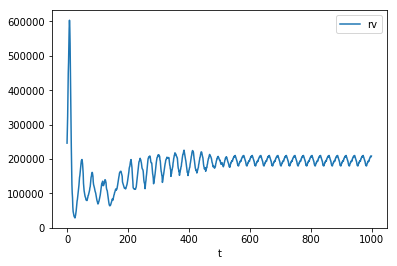

In [13]:
ax = df.plot(x='t', y='rv')
#ax.set_xlim(left=800, right=820)

In [14]:
df.tail(30)

,t,rv
970,970,208950
971,971,208494
972,972,210160
973,973,206388
974,974,205093
975,975,200566
976,976,199056
977,977,194481
978,978,193973
979,979,187488


In [15]:
last = df.loc[df.t>=600] # it has stabilised into a cycle after 600 minutes

In [16]:
last[last.rv == last.rv.min()] # where are the minima?

,t,rv
619,619,179922
647,647,179922
675,675,179922
703,703,179922
731,731,179922
759,759,179922
787,787,179922
815,815,179922
843,843,179922
871,871,179922


In [17]:
last[last.rv == last.rv.min()]['t'] - last[last.rv == last.rv.min()]['t'].shift() # how far apart are the minima?

619     NaN
647    28.0
675    28.0
703    28.0
731    28.0
759    28.0
787    28.0
815    28.0
843    28.0
871    28.0
899    28.0
927    28.0
955    28.0
983    28.0
Name: t, dtype: float64

In [18]:
period = 28

In [19]:
cycle = last.loc[619:646] # pandas indexing is inclusive

In [20]:
part2 = cycle.iloc[(1000000000 - cycle.iloc[0].t) % period]

In [21]:
part2.rv

210160